<a href="https://colab.research.google.com/github/CharlesHehe/ML/blob/main/CatsandDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [11]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [5]:
pwd

'/home/charleshe/JupyterProjects'

In [13]:
filenames=os.listdir("./datasets/dogs-vs-cats/train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [19]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [22]:
validate_df

,filename,category
0,dog.8302.jpg,dog
1,cat.1357.jpg,cat
2,cat.6844.jpg,cat
3,dog.10534.jpg,dog
4,dog.1603.jpg,dog
...,...,...
4995,dog.3499.jpg,dog
4996,cat.798.jpg,cat
4997,cat.6411.jpg,cat
4998,cat.11530.jpg,cat


In [63]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./datasets/dogs-vs-cats/train",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./datasets/dogs-vs-cats/train", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "./datasets/dogs-vs-cats/test1/",x_col='filename',y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.


In [61]:
validation_generator.class_mode

'categorical'

In [28]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 279s 209ms/step - loss: 0.7467 - accuracy: 0.6289 - val_loss: 0.5767 - val_accuracy: 0.7045
Epoch 2/10
1333/1333 [==============================] - 280s 210ms/step - loss: 0.5427 - accuracy: 0.7327 - val_loss: 0.8351 - val_accuracy: 0.6486
Epoch 3/10
1333/1333 [==============================] - 283s 212ms/step - loss: 0.5038 - accuracy: 0.7617 - val_loss: 0.4235 - val_accuracy: 0.8066
Epoch 4/10
1333/1333 [==============================] - 304s 228ms/step - loss: 0.4648 - accuracy: 0.7838 - val_loss: 0.4202 - val_accuracy: 0.8120
Epoch 5/10
1333/1333 [==============================] - 289s 217ms/step - loss: 0.4357 - accuracy: 0.8039 - val_loss: 1.2252 - val_accuracy: 0.5409
Epoch 6/10
1333/1333 [==============================] - 281s 211ms/step - loss: 0.4143 - accuracy: 0.8187 - val_loss: 0.3701 - val_accuracy: 0.8509
Epoch 7/10
1333/1333 [==============================] - 280s 210ms/step - loss: 0.4066 - accuracy: 0.8170 - val_

In [29]:
model.save("model1_catsVSdogs_10epoch.h5")

'=0.0.7'   datasets/   model1_catsVSdogs_10epoch.h5
 cnn/      email2/     recommendation_system/
 cv/       fastai/    'Untitled Folder'/


In [64]:
test_filenames = os.listdir("./datasets/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [65]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.8/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [67]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<Figure size 1200x2400 with 0 Axes>

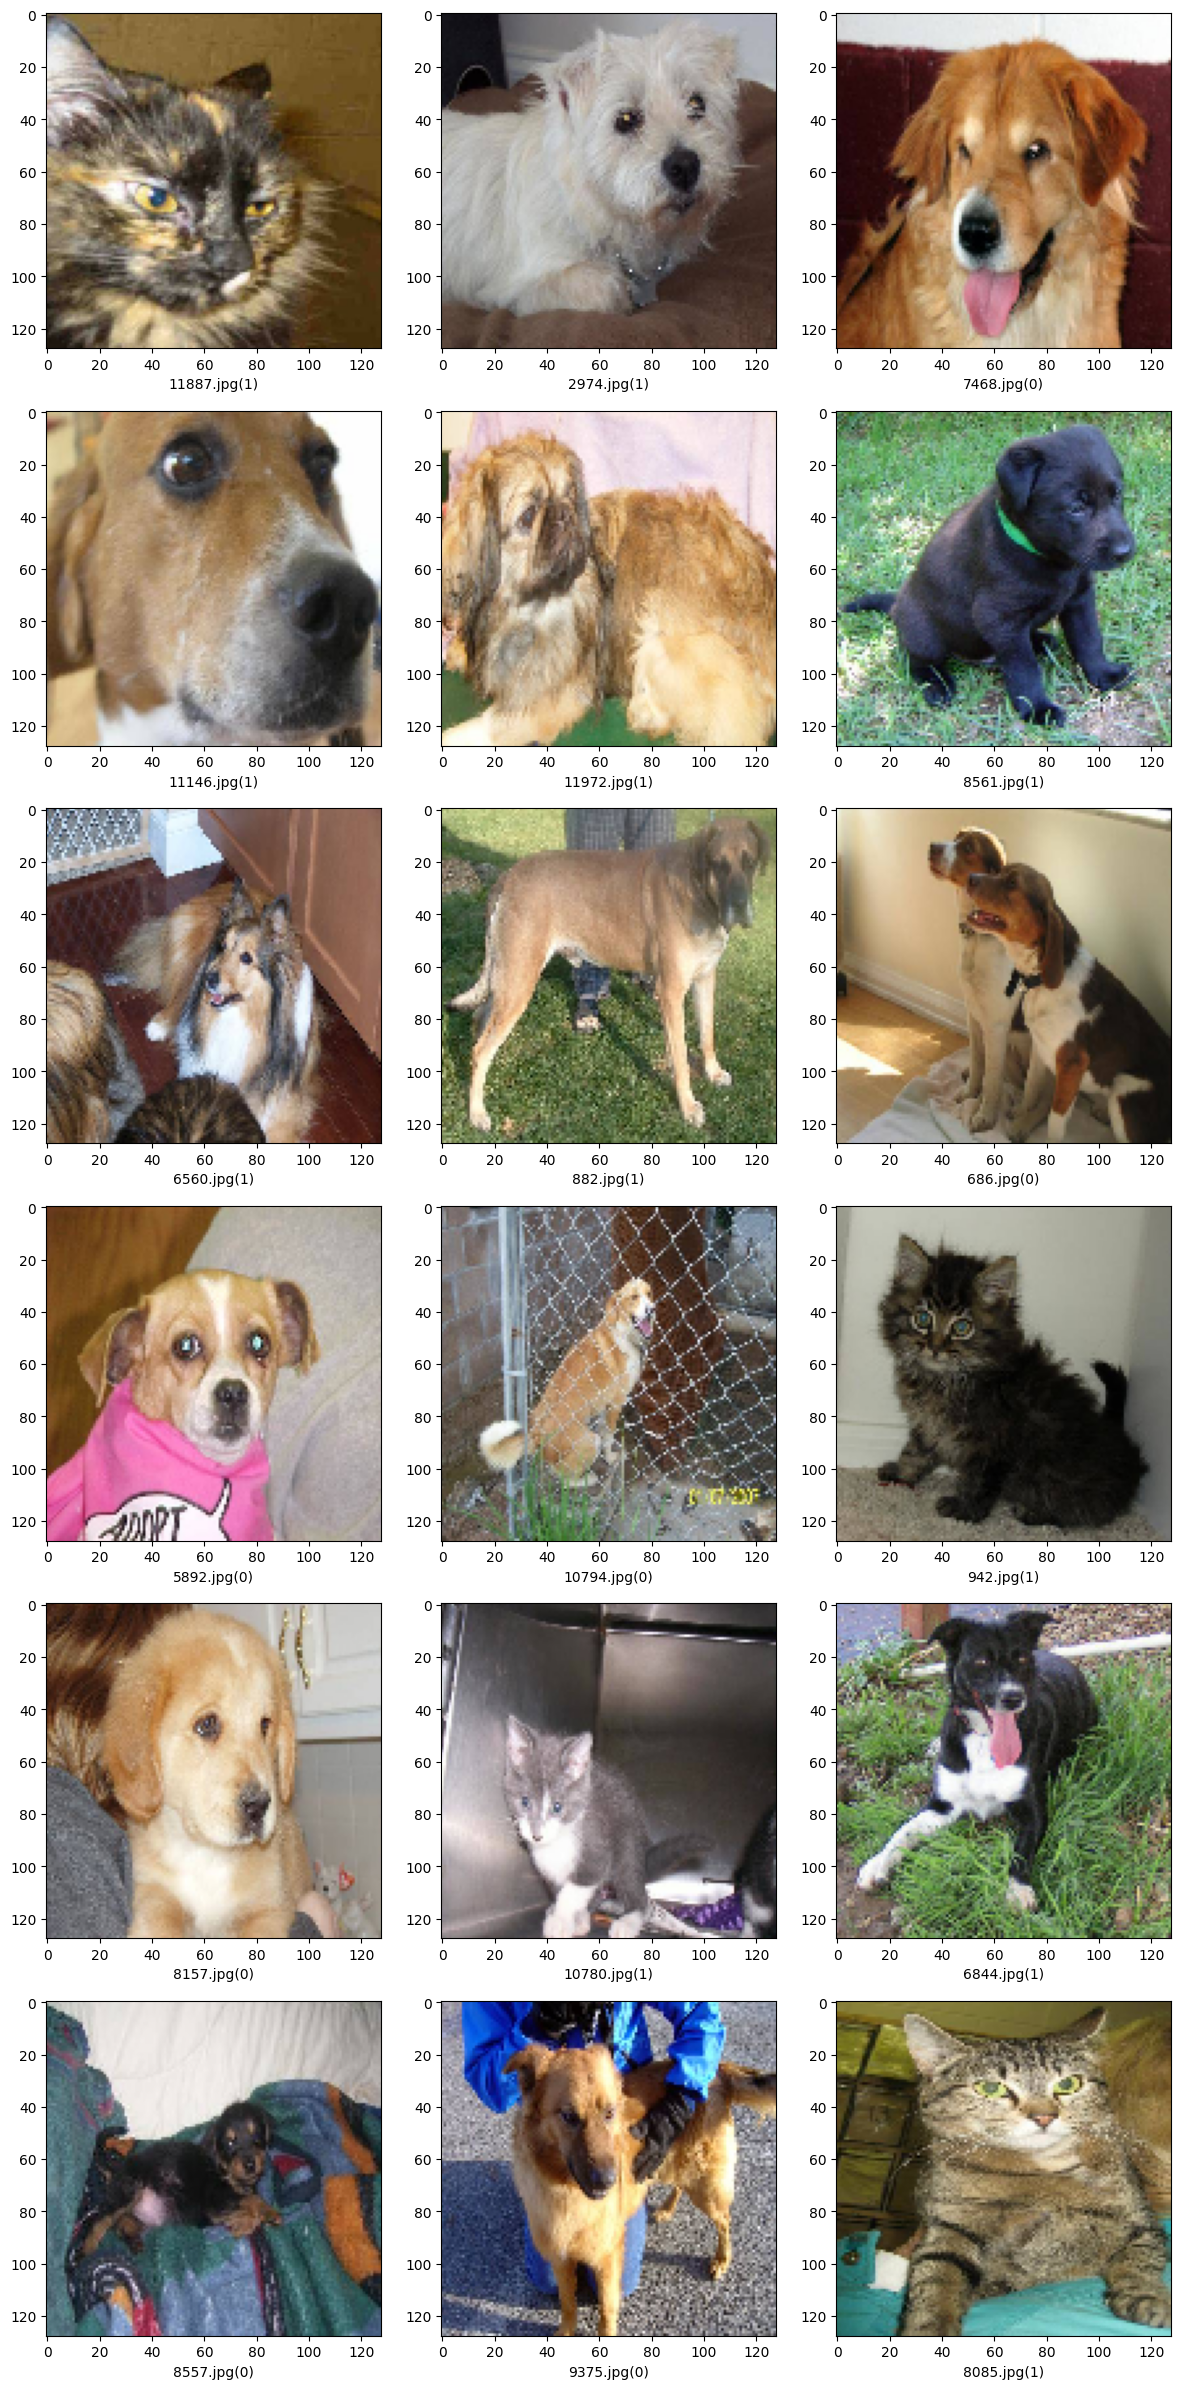

In [69]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./datasets/dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [81]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("./datasets/dogs-vs-cats/test1/65.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
print(im.shape)
pred=model.predict([im])[0]
pred
# print(pred,results[pred])

(1, 128, 128, 3)


array([2.7537649e-04, 9.9972457e-01], dtype=float32)

In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('model1_catsVSdogs_10epoch.h5')
#dictionary to label all traffic signs class.
classes = { 
    0:'its a cat',
    1:'its a dog',
 
}
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('CatsVSDogs Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict([image])
    print(pred)
    pred = pred[0]
    print(pred)
    sign = classes[numpy.argmax(pred)]
    print(numpy.argmax(pred))
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="CatsVSDogs Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

[[0.00227514 0.99772483]]
[0.00227514 0.99772483]
1
its a dog
[[0.00227514 0.99772483]]
[0.00227514 0.99772483]
1
its a dog
[[0.27060807 0.72939193]]
[0.27060807 0.72939193]
1
its a dog
[[0.0494577 0.9505423]]
[0.0494577 0.9505423]
1
its a dog
[[0.8485504 0.1514496]]
[0.8485504 0.1514496]
0
its a cat
[[0.4701908  0.52980924]]
[0.4701908  0.52980924]
1
its a dog
[[0.1158184 0.8841817]]
[0.1158184 0.8841817]
1
its a dog
[[0.03238814 0.9676118 ]]
[0.03238814 0.9676118 ]
1
its a dog
[[0.95480007 0.0451999 ]]
[0.95480007 0.0451999 ]
0
its a cat
[[0.07625179 0.9237482 ]]
[0.07625179 0.9237482 ]
1
its a dog
[[0.06936531 0.9306347 ]]
[0.06936531 0.9306347 ]
1
its a dog
[[0.14890191 0.85109806]]
[0.14890191 0.85109806]
1
its a dog


In [4]:
%pwd

'/home/charleshe/JupyterProjects'